
Enter the following details to predict BMI level:
Age: 30

Predicted BMI Level: 30.47


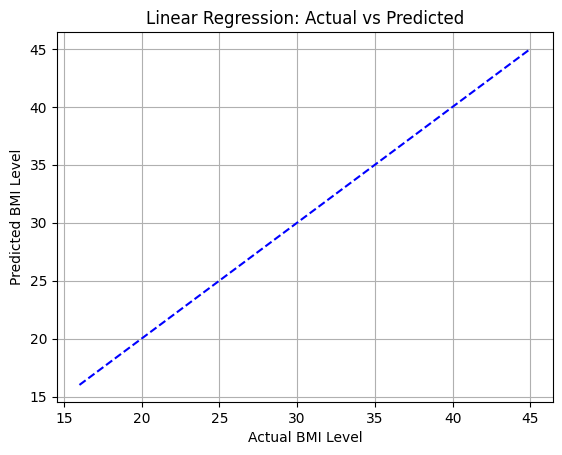

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('/content/dataset_med.csv')

# Target should be continuous
X = data[['age']]
y = data['bmi']  # Continuous target for linear regression

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict
y_pred = linreg.predict(X_test)

# --- USER INPUT SECTION ---
print("\nEnter the following details to predict BMI level:")
try:
    age = float(input("Age: "))
    # Prepare and scale input
    user_data = pd.DataFrame([[age]], columns=['age'])
    user_scaled = scaler.transform(user_data)

    # Predict cholesterol level
    user_prediction = linreg.predict(user_scaled)
    print(f"\nPredicted BMI Level: {user_prediction[0]:.2f}")

except Exception as e:
    print(f"Invalid input! Error: {e}")

# --- Plot: Actual vs Predicted ---
plt.xlabel("Actual BMI Level")
plt.ylabel("Predicted BMI Level")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'b--')  # Reference line
plt.show()

Linear Regression MSE: 70.32
Linear Regression R² Score: -0.00

Enter the following details to predict BMI level:
Age: 22

Predicted BMI Level: 30.46


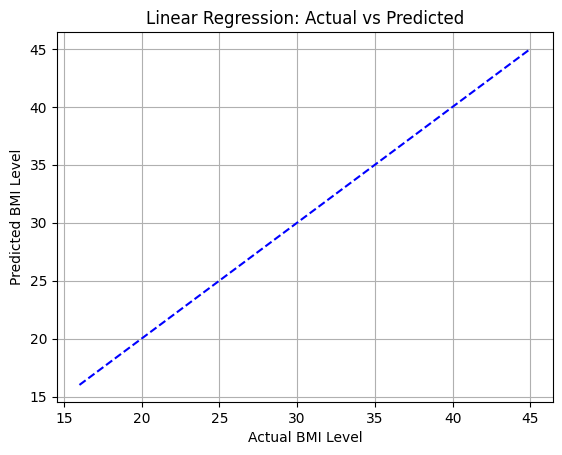

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# --- Load and Prepare Data ---
data = pd.read_csv('/content/dataset_med.csv')
data.dropna(inplace=True)

# Select features and target
features = ['age']
X = data[features]
y = data['bmi']

# Keep a copy of age before scaling
age_values = X['age'].copy()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (get indices to retrieve age later)
X_train, X_test, y_train, y_test, age_train, age_test = train_test_split(
    X_scaled, y, age_values, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression MSE: {mse:.2f}")
print(f"Linear Regression R² Score: {r2:.2f}")

# --- User Input Prediction ---
print("\nEnter the following details to predict BMI level:")
try:
    age_str = input("Age: ")
    age = float(age_str)
    if age < 1:
        raise ValueError("Age must be greater than or equal to 1.")

    # Prepare and scale input
    user_input = pd.DataFrame([[age]], columns=features)
    user_scaled = scaler.transform(user_input)

    # Predict BMI
    bmi_pred = model.predict(user_scaled)
    print(f"\nPredicted BMI Level: {bmi_pred[0]:.2f}")

except ValueError as ve:
    print(f"Invalid input! {ve}")
except Exception as e:
    print(f"Unexpected error: {e}")

# --- Plot: Actual vs Predicted ---
plt.xlabel("Actual BMI Level")
plt.ylabel("Predicted BMI Level")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'b--')  # Reference line
plt.show()



In [ ]:
import pandas as pd
data = pd.read_csv('/content/dataset_med.csv')
data.dropna(inplace=True)
data.drop_duplicates(inplace = True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[data.select_dtypes(include='number').columns] = scaler.fit_transform(data.select_dtypes(include='number'))

data.to_csv("cleaned_test.csv", index=False)

print("Cleaned dataset has been saved to 'cleaned_disease_test.csv'")

Cleaned dataset has been saved to 'cleaned_disease_test.csv'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv('/content/cleaned_test.csv')

# Features and target
X = data[['age', 'bmi', 'asthma', 'hypertension']]
y = data['survived']  # Predicting survival

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data with stratify to ensure both survival classes are represented
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on test set
y_pred = logreg.predict(X_test)

# --- USER INPUT SECTION ---
print("\nEnter the following details to predict survival:")

try:
    age = float(input("Age: "))
    bmi = float(input("BMI: "))
    asthma = int(input("Asthma (0 = No, 1 = Yes): "))
    hypertension = int(input("Hypertension (0 = No, 1 = Yes): "))

    # Prepare and scale input
    user_data = pd.DataFrame([[age, bmi, asthma, hypertension]], columns=['age', 'bmi', 'asthma', 'hypertension'])
    user_scaled = scaler.transform(user_data)

    # Predict
    user_prediction = logreg.predict(user_scaled)
    result = "Survived" if user_prediction[0] == 1 else "Did Not Survive"
    print(f"\nPredicted Survival Outcome: {result}")

except Exception as e:
    print(f"Invalid input. Error: {e}")



Enter the following details to predict survival:
Age: 21
BMI: 22.4
Asthma (0 = No, 1 = Yes): 1
Hypertension (0 = No, 1 = Yes): 0

Predicted Survival Outcome: Did Not Survive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv('/content/cleaned_test.csv')

# Convert cholesterol level to binary (0: normal, 1: high)
data['cholesterol_level'] = (data['cholesterol_level'] >= 200).astype(int)

# Features and target
X = data[['age', 'bmi', 'asthma', 'hypertension']]
y = data['cholesterol_level']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy:.2f}")



KNN Model Accuracy: 1.00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv('/content/dataset_med.csv')

# Convert cholesterol level to binary (0: normal, 1: high)
data['cholesterol_level'] = (data['cholesterol_level'] >= 200).astype(int)

# Features and target
X = data[['age', 'bmi', 'asthma', 'hypertension']]
y = data['cholesterol_level']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy:.2f}")


KNN Model Accuracy: 0.76
